**k-近邻算法**
<p>
      k-近邻算法是分类数据中最简单有效的算法，它是基于实例学习的，使用算法时我们必须有接近实际数据的训练样本数据；k-近邻算法必须保存全部数据，如果训练数据集很大，必须使用大量的存储空间。此外由于必须对数据集中的每个数据计算距离，实际，使用时间可能非常耗时
</p><p>
    k-近邻算法的缺陷就是，它无法给出任何数据的基础结构信息，因此我们也无法知晓平均实例样本和典型实例样本具有什么特征
</p>

**欧式距离：(Euclidean distance)**

$$d(X,Y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}$$
<ul>
    <li>对称性</li>
    <li>非负性</li>
    <li>三角不等式</li>
</ul>

**闵可夫斯基距离：（Minkowski distance）**
$$d(X,Y) = \left( \sum_{i=1}^n|x_i-y_i|^r \right)^{1/r} $$
*作为闵可夫斯基距离的推广得到 欧几里得距离*

**相似性与相异性度量**
<p>
    相似性和相异性是重要的概念，因为它在许多数据挖掘技术中被应用。他们使用来描述对象间的邻近程度，他们的度量函数有 相关（也称皮尔逊距离）、欧几里得距离、Jaccard 、余弦相似性度量。 前两者使用于像时间序列这样的稠密数据，后俩适用于文档这样的稀疏数据
   
<ul>
    <li>
       相似度定义两个对象的相似程度，值越高越相似、相异度定义两个对象的相异度，值越低越相似。他们通常为正值在区间[0,1]取值
    </li>
    <li>
       为了迎合框架，需要相似性和向异性间互转，或约定值域我们需要把元数据归一[0,1]内，更为重要的是做线性分析或者非线性分析的时候对对象实施降维，这个时候就需要数据归一（例如：年龄+收入的时候，年龄会被淹没）。对于归一技术有 $$
    </li>
    <li>
        
    </li>
</ul>
    
</p>


<table>
    <tr>
        <td>1</td>
        <td>2</td>
    </tr>
</table>

In [14]:
'''
k-邻近算法
'''
#encoding:utf-8
import numpy as np
import matplotlib as plt
import operator 
import matplotlib.pyplot as plt
import pandas as pd
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels
#np.tile([0,0],(3,3,2))
test = np.array([[6,4,1],[2,5,1]],np.int32)
test.argsort()
#display(test)

array([[2, 1, 0],
       [2, 0, 1]], dtype=int64)

In [ ]:
def classify(inX,dataSet,labels,k):
    dataSetSize =dataSet.shape[0] # 数据的维度
    diffMat = np.tile(inX,(dataSetSize,1))-dataSet     # np.tile 复制一个矩阵  
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1) # sum 两向量间分量的距离平方和
    distances = np.sqrt(sqDistances)
    sortedDistancesIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteLabel = labels[sortedDistancesIndicies[i]]
        classCount[voteLabel] = classCount.get(voteLabel,0)+1 #get(key,default) 
    sortedClassCount = sorted(classCount.iteritems(),
                              key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

    

In [123]:
group,labels = createDataSet()
#display(group)
#display(labels)
#classify([0,0],group,labels,3)
#np.zeros((3,2))
import pandas as pd
#data = pd.read_table('../Ch02/datingTestSet.txt',header=None,encoding='gb2312',delim_whitespace='\t',index_col=0)
#header=None:没有每列的column name，可以自己设定
#encoding='gb2312':其他编码中文显示错误
#delim_whitespace=True:用空格来分隔每行的数据
#index_col=0:设置第1列数据作为index
#np.ones(20)


In [141]:
def file2matrix(filename):
    fr = open(filename)
    #display(fr)
    arrayOfLines = fr.readlines()
    #display(arrayOfLines)
    numbersOfLlines = len(arrayOfLines)
    returnMat = np.zeros((numbersOfLlines,3)) #zeros(row,column)
    classLabelVector = [] 
    index = 0 
    for line in arrayOfLines:
        line = line.strip() # 去除两段的字符 如果味None 则去除两端的额空
        listFromLine = line.split('\t')
        #display(listFromLine[0:3])
        returnMat[index,:] = listFromLine[0:3] #这里写死是因为只有三个特征
        if listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        else:
            classLabelVector.append(1)
        index += 1
    return returnMat,classLabelVector

In [ ]:
datingDataMat,datingLabels = file2matrix('../Ch02/datingTestSet.txt')
#display(datingDataMat[0:5])
#display(datingLabels[0:5])
fig = plt.figure()
ax = fig.add_subplot(111)
#display(datingDataMat[:,1])
ax.scatter(datingDataMat[:,0],datingDataMat[:,1]
           ,15*np.array(datingLabels),15*np.array(datingLabels))
'''
ax.scatter(datingDataMat[:,0],datingDataMat[:,1]
           ,15*np.array(datingLabels),15*np.array(datingLabels),marker='x',label='C2')
'''
label = np.array(datingLabels);
idx_1 = np.where(label == 1)      #找label中为1的位置
p1 = plt.scatter(datingDataMat[idx_1,0], datingDataMat[idx_1,1]
                 , marker = 'o', color = 'm', label='didntLike', s = 30)
idx_2 = np.where(label == 2)
p2 = plt.scatter(datingDataMat[idx_2,0],datingDataMat[idx_2,1],
                 marker='o',color='c',label='smallDoses',s=50)
idx_3 = np.where(label == 3)
p3 =  plt.scatter(datingDataMat[idx_3,0],datingDataMat[idx_3,1]
                 ,marker='o',color='r',label='largeDoses',s=15)

plt.ylabel("game")
plt.xlabel("fei xing ju li")
plt.legend(loc='upper left')
#plt.plot(datingDataMat[:,0],datingDataMat[:,1],labels='didntLike')
plt.show()
#pd.DataFrame.append(（"name","sex"）)

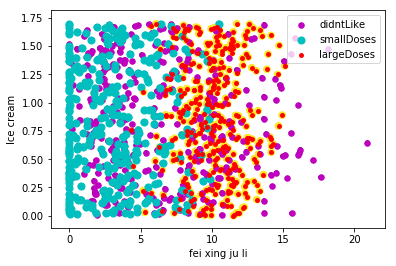

In [210]:
datingDataMat,datingLabels = file2matrix('../Ch02/datingTestSet.txt')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2]
           ,15*np.array(datingLabels),15*np.array(datingLabels))
label = np.array(datingLabels);
idx_1 = np.where(label == 1)      #找label中为1的位置
p1 = plt.scatter(datingDataMat[idx_1,1], datingDataMat[idx_1,2]
                 , marker = 'o', color = 'm', label='didntLike', s = 30)
idx_2 = np.where(label == 2)
p2 = plt.scatter(datingDataMat[idx_2,1],datingDataMat[idx_2,2],
                 marker='o',color='c',label='smallDoses',s=50)
idx_3 = np.where(label == 3)
p3 =  plt.scatter(datingDataMat[idx_3,1],datingDataMat[idx_3,2]
                 ,marker='o',color='r',label='largeDoses',s=15)

plt.ylabel("Ice cream")
plt.xlabel("fei xing ju li")
plt.legend(loc='upper right')
#plt.plot(datingDataMat[:,0],datingDataMat[:,1],labels='didntLike')
plt.show()

In [175]:
#display(datingDataMat[0:5].max(0))
test = np.tile([1,2,3],(4,1))
display(test)
display(test[1,:])
#display(test[0])
#display(test[0].shape[0])
#数据归一特征值  归一到 [0,1)
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals,(m,1))
    normDataSet = normDataSet/np.tile(ranges,(m,1))
    return normDataSet,ranges,minVals

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

array([1, 2, 3])

In [180]:
# 测试function
def dataClassTest():
    hoRatio = 0.1
    datingDataMat,datingLabels = file2matrix("../Ch02/datingTestSet.txt")
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]  #m=1000 共有以千跳数据
    numTestVecs = int(m*hoRatio)
    display(m)
    display(numTestVecs)
    errorCount = 0.0
    for i in range(numTestVecs):
        '''
            取(100,m]跳数据作为训练集
        '''
        classifierResult = classify(normMat[i,:],normMat[numTestVecs:m,:]
                                    ,datingLabels[numTestVecs:m],3)
        print "the classifier came back with : %d,the real  \
        answer is: %d"%(classifierResult,datingLabels[i])
        if(classifierResult != datingLabels[i]):
            errorCount +=1
        print "the total error rate is %f " %(errorCount/float(numTestVecs))


In [181]:
dataClassTest()

1000L

100

the classifier came back with : 3,the real          answer is: 3
the total error rate is 0.000000 
the classifier came back with : 2,the real          answer is: 2
the total error rate is 0.000000 
the classifier came back with : 1,the real          answer is: 1
the total error rate is 0.000000 
the classifier came back with : 1,the real          answer is: 1
the total error rate is 0.000000 
the classifier came back with : 1,the real          answer is: 1
the total error rate is 0.000000 
the classifier came back with : 1,the real          answer is: 1
the total error rate is 0.000000 
the classifier came back with : 3,the real          answer is: 3
the total error rate is 0.000000 
the classifier came back with : 3,the real          answer is: 3
the total error rate is 0.000000 
the classifier came back with : 1,the real          answer is: 1
the total error rate is 0.000000 
the classifier came back with : 3,the real          answer is: 3
the total error rate is 0.000000 
the classi

In [366]:
# 根据KNN的手写识别系统
from os import  listdir
def img2Vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
             returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect
def handwritingClassTest():
    hwLabels = [] 
    trainingFileList =listdir('../Ch02/digits/trainingDigits')
    m = len(trainingFileList)
    trainingMat = np.zeros((m,1024))
    display(m)
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        #print '../Ch02/digits/trainingDigits/%s'% fileNameStr
        trainingMat[i,:] = img2Vector('../Ch02/digits/trainingDigits/%s'% fileNameStr)
    testFileList = listdir('../Ch02/digits/testDigits')
    errorCount = 0
    mTest = len(testFileList)
    display(mTest)
    count = 0
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = fileStr.split('_')[0]
        vectorUnderTest = img2Vector('../Ch02/digits/testDigits/%s' % fileNameStr)
        classifierResult = classify(vectorUnderTest,trainingMat,hwLabels,3)
        if count <20:
            print "the classifier came back with : %d,the real answer is : %s\
              " % (classifierResult,classNumStr)
            count+=1
        if(int(classifierResult) != int(classNumStr)):
            errorCount +=1
    print "\nthe total number of error is: %d" % errorCount
    print "\nthe total error rate is: %f" %(errorCount/float(mTest))
    

In [367]:
handwritingClassTest()

1934

946

the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the classifier came back with : 0,the real answer is : 0              
the cl

**决策树**
    <p>
        基于信息熵的决策树，信息熵是有20世纪 克劳德.香农创造。
    </p>
     <p>  基于熵的方法是最有前途的离散化方法之一，设在R(x,y) 在 $R^2$ 上有一堆散乱的数据有K中类别 $m_i$ 是某个划分的第i个区间中值的个数，而 $m_{ij}$ 是区间i中类j的值个数。则第i个区间的熵 $e_i$ 有一下等式给出
    $$e_i = -\sum_{j=1}^kp_{ij}log_2^{p_{ij}}$$
其中 $p_{ij}= m_{ij}/m_i$ 是第i个区间中类j的概率。该划分的总熵e 是每个区间的熵的加权平均，即
    $$ e = \sum_{i=1}^n w_ie_i$$
其中，m是值的个数，$w_i = m_i / m$ 是第i个区间的比值,而n 是区间的个数。直观上，区间的熵是区间纯度的度量。如果一个区间只包含一个类的值（该区间非常纯），则其熵为0 并且不影响总熵。去过一个区间中的值类出现的频率相等（该区间尽可能不纯）则其熵最大。   
</p>
<p>
    一种划分连续性属性的简单方法：开始，将初始值切分为两个部分，让两个结果区间产生最小熵。该技术只要把每个值看作可能的分割点即可，因为假定区间包含有序值的集合。然后取以区间通常选取具有最大熵的区间，重复此过程，直到区间的个数达到用户指定的个数，或满足总之条件为止
</p>
<ul>
    <li>
        **分类任务：** 输入数据是记录的集合。每条记录也称实例或者样例，用元组（x,y）表示，其中x 是属性集合，而y是一个特殊的属性，指出样例的类标号（也称为分类属性或目标属性）用来将脊椎动物分位：哺乳类、鸟类、鱼类、爬行类和两栖类。属性集指明脊椎动物的性质如：体温、表皮覆盖等。尽管表中数据都是离散的，但属性集也可以是连续的特征值。但是类标号必须是离散的。这真是区分分类与回归的关键特征。*回归是一种预测建模任务，其目标y是连续的*
    </li>
    <li>
           **分类：**分类任务就是通过学习得到一个**目标函数** f,把每个属性集x 映射到一个预定义的类标号 y。目标函数也称之为 **分类模型**
          <br></br>
          **描述性建模：** 分类模型可以作为解释性工具，用于区分不同的对象。
          <br></br>
          **预测性建模：** 分类模型可以预测未知记录的类标号。
    </li>
    <li>
       **解决分类问题：**根据输入数据，建立分类模型的系统方法。分类的方法包括 *决策树分类法、基于规则分类法、神经网络、支持向量机和朴素贝叶斯分类法* ，使用一种学习算法，确定一种分类模型，该模型能够很好的拟合输入数据中类标号和属性集之间的关系。学习算法得到的模型不仅能都很好的拟合输入数据，还要能够正确的预测未知样本类标号。因此训练算法的主要目的就是建立具有很好的泛化能力模型，即建立能够准确的预测未知样本类标号的模型.
        <img src = 'img/img_1.png'> 
        <br></br>
        分类模型的性能是根据模型正确和错误预测的检验记录进行评估,性能度量如下
        $$  准确率 = \frac{正确预测数}{预测总数}    $$
        $$  错误率 = \frac{错误预测数}{预测总数}    $$
        
    </li>

</ul>

<table border="black">
    <tr><td align="center" colspan="9">表-1</td></tr>
    <tr scope="col">
        <th>名字</th>
        <th>体温</th>
        <th>表皮覆盖</th>
        <th>胎生</th>
        <th>水生生物</th>
        <th>飞行动物</th>
        <th>有腿</th>
        <th>冬眠</th>
        <th>类标号</th>
    <tr>
    <tr>
        <td>人类</td>
        <td>恒温</td>
        <td>毛发</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>哺乳动物</td>
    <tr>
    <tr>
        <td>蟒蛇</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>爬行类</td>
    <tr>
        <tr>
        <td>鲑鱼</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>鱼类</td>
    <tr>
        <tr>
        <td>鲸</td>
        <td>恒温</td>
        <td>毛发</td>
        <td>是</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>哺乳类</td>
    <tr>
        <tr>
        <td>青蛙</td>
        <td>冷血</td>
        <td>无</td>
        <td>否</td>
        <td>半</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>两栖类</td>
    <tr>
        <tr>
        <td>巨蜥</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>爬行类</td>
    <tr>
        <tr>
        <td>蝙蝠</td>
        <td>恒温</td>
        <td>毛发</td>
        <td>是</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>是</td>
        <td>哺乳类</td>
    <tr>
        <tr>
        <td>鸽子</td>
        <td>恒温</td>
        <td>羽毛</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>否</td>
        <td>鸟类</td>
    <tr>
         <tr>
        <td>猫</td>
        <td>恒温</td>
        <td>软毛</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>鸟类</td>
    <tr>
         <tr>
        <td>豹纹鲨</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>是</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>鱼类</td>
    <tr>
         <tr>
        <td>海龟</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>否</td>
        <td>半</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>爬行类</td>
    <tr>
         <tr>
        <td>企鹅</td>
        <td>恒温</td>
        <td>羽毛</td>
        <td>否</td>
        <td>半</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>鸟类</td>
    <tr>
         <tr>
        <td>豪猪</td>
        <td>恒温</td>
        <td>刚毛</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>哺乳类</td>
    <tr>
         <tr>
        <td>鳗鱼</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>鱼类</td>
    <tr>
         <tr>
        <td>蝾螈</td>
        <td>冷血</td>
        <td>无</td>
        <td>否</td>
        <td>半</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>两栖类</td>
    <tr>
</table>


In [15]:
from math import log
def calcShannonEnt(dataSet):
    #display(dataSet)
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        #display(featVec)
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 1
        else:
            labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    #display(labelCounts)
    for key in labelCounts:
        #display(key)
        prob = float(labelCounts[key])/numEntries 
        #display(prob)
        shannonEnt =shannonEnt- prob * log(prob,2)
    return shannonEnt
'''
    简单测试数据
'''
def createDataSet():
    dataSet=[[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
    dataFrame={'能否浮处水面':[1,1,1,0,0],
               '是否有脚蹼':[1,1,0,1,1],'结果':['yes','yes','no','no','no']}
    labels = ['no surfacing','flippers']
    return dataSet,labels,dataFrame

'''
获取数据集的特征值
'''
def splitDataSet(dataSet,axis,value):
    retDataSet = [] 
    for featVec   in  dataSet :
        if featVec[axis] == value :
            reducedFeatVec = featVec[:axis] # axis = 0 、1  
            reducedFeatVec.extend(featVec[axis+1 :])
            retDataSet.append(reducedFeatVec)
    return retDataSet
'''
计算最大信息熵
'''
def chooseBestFeatureToSplit(dataSet):
    numFeature = len(dataSet[0]) -1 # 去除结果
    bastEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0  #最好的信息增益
    bestFeature = -1 # 最好的特征分类
    for i in range(numFeature):
        featList = [example[i] for example in dataSet]
        #display(featList)
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value) # 划分类别
            #print i
            display(subDataSet)
            prob = len(subDataSet)/float(len(dataSet)) # 权值
            newEntropy = newEntropy + prob* calcShannonEnt(subDataSet) # 某个区间上的熵
        infGain = bastEntropy -newEntropy
        if(infGain > bestInfoGain):
            bestInfoGain = infGain
            bestFeature = i
    return bestFeature
'''
获取最优标志分类
'''
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] =1
        else:
            classCount[vote] +=1
    sortedClassCount = sorted(classCount.iteritems(),
                             key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]
'''
构造树数据结构
'''
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet] # 获得数据集，结果
    display(classList)
    if (classList.count(classList[0])== len(classList)) :  # 类别完全相同则停止划分
        return classList[0]
    if (len(dataSet[0]) ==1):
        #print "dataSet.length %d" %len(dataSet[0])
        #display(dataSet)
        return majorityCnt(classList=classList)
    
    #获取具有最大信息熵特征值虽在列索引
    bestFeat = chooseBestFeatureToSplit(dataSet=dataSet) 
    print bestFeat
    print labels
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    
    #获取当前数据集最大信息熵特征列集合
    featValues = [example[bestFeat] for example in dataSet] 
    uniqueVals = set(featValues) #当前特征值列的不重复特征
    for value in uniqueVals:
        subLabels = labels[:]
        
        #splitDataSet(dataSet,bestFeat,value) 计算当前特征列 值为value的 数据集
        display(splitDataSet(dataSet,bestFeat,value))
        myTree[bestFeatLabel][value] = createTree(
            splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree
                       
        
                       

In [6]:
myData,labels,dataFrame = createDataSet()
df = pd.DataFrame(dataFrame)
display(df)
display(labels)
#display(createTree(myData,labels=labels))
#chooseBestFeatureToSplit(myData)
tree  = createTree(myData,labels)
myData,labels,dataFrame = createDataSet()

,是否有脚蹼,结果,能否浮处水面
0,1,yes,1
1,1,yes,1
2,0,no,1
3,1,no,0
4,1,no,0


['no surfacing', 'flippers']

['yes', 'yes', 'no', 'no', 'no']

[[1, 'no'], [1, 'no']]

[[1, 'yes'], [1, 'yes'], [0, 'no']]

[[1, 'no']]

[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]

0
['no surfacing', 'flippers']


[[1, 'no'], [1, 'no']]

['no', 'no']

[[1, 'yes'], [1, 'yes'], [0, 'no']]

['yes', 'yes', 'no']

[['no']]

[['yes'], ['yes']]

0
['flippers']


[['no']]

['no']

[['yes'], ['yes']]

['yes', 'yes']

In [8]:
decisionNode = dict(boxstyle="sawtooth",fc="0.8")
leafNode = dict(boxstyle="round4",fc="0.8")
arrow_args = dict(arrowstyle="<-")

'''
绘制带箭头的注解
'''
def plotNode(nodeText,centerPt,parentPt,noteType):
    createPlot.ax1.annotate(nodeText,xy=parentPt,xycoords="axes fraction"
                           ,xytext=centerPt,textcoords='axes fraction'
                           ,va ="center",ha="center",bbox=noteType,arrowprops=arrow_args)
'''
获取树的叶子节点
'''
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = myTree.keys()[0]
    display(firstStr)
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs +=1
    return numLeafs
'''
    计算树深度
'''
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDic = myTree[firstStr]
    for key in secondDic.keys():
        if type(secondDic[key]).__name__ == "dict":
            thisDepth = 1 +  getTreeDepth(secondDic[key])
        else:
            thisDepth =1
        #print "key:%s ,thisDepth:%d ,maxDepth:%s"%(key,thisDepth,maxDepth)
        if thisDepth > maxDepth :
            maxDepth = thisDepth
    return maxDepth
'''
计算两节点的中心距离 添加类标号
'''      
def plotMidText(centerPt,parentPt,textString):
    #print "parentPt:[%d,%d]" %(parentPt[0],parentPt[1])
    #print "centerPt:[%d,%d]" %(centerPt[0],centerPt[1])
    xMid = (parentPt[0]-centerPt[0])/2.0 + centerPt[0]
    yMid = (parentPt[1]-centerPt[1])/2.0 + centerPt[1]
    #print xMid
    #print yMid
    createPlot.ax1.text(xMid,yMid,textString.decode("utf-8"))
def plotTree(myTree,parentPt,nodeText):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = myTree.keys()[0]
    centerPt =(plotTree.xOff+(1.0+ float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)
    #centerPt =(float(numLeafs)/2.0/plotTree.totalW,plotTree.yOff)
    #print centerPt
    plotMidText(centerPt,parentPt,nodeText)
    plotNode(firstStr,centerPt,parentPt,decisionNode)
    secondeDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff- 1.0/plotTree.totalD
    for key in secondeDict.keys():
        if type(secondeDict[key]).__name__ =="dict":
            plotTree(secondeDict[key],centerPt,str(key))
        else:
            plotTree.xOff =  plotTree.xOff + 1.0 /plotTree.totalW
            plotNode(secondeDict[key],(plotTree.xOff,plotTree.yOff),centerPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),centerPt,str(key.encode("utf-8")))
    plotTree.yOff =plotTree.yOff + 1.0/plotTree.totalD #画完子树回复坐标
def createPlot(inTree):
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    axprops = dict(xticks=[],yticks=[])
    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW = float(getNumLeafs(inTree)) # 宽
    plotTree.totalD = float(getTreeDepth(inTree)) # 高
    plotTree.xOff = -0.5/plotTree.totalW
    #plotTree.xOff = 0
    plotTree.yOff = 1.0
    plotTree(inTree,(0.5,1.0),'') 
    plt.show()
    
'''
决策树分类
'''
def classify(inputTree,featLabels,testVec):
    firstStr = inputTree.keys()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == "dict":
                classLabel=classify(secondDict[key],featLabels,testVec)
                print classLabel
            else:
                classLabel =secondDict[key]
                print classLabel
    return classLabel
def storeTree(inputTree,fileName) :
    import pickle
    fw = open(fileName,'w')
    pickle.dump(inputTree,fw)
    fw.close()
def grabTree(fileName):
    import pickle
    fr = open(fileName)
    return pickle.load(fr)
#tree = createTree(lenses,leneseLabels)
#createPlot(tree)

In [ ]:
display(labels)
display(tree)
#storeTree(tree,"classifierStoreage.txt")
#getNumLeafs(tree)
#getTreeDepth(tree)
#createPlot(tree)
#display(labels)
#classify(tree,labels,[1,0])
#fr = open('../Ch03/lenses.txt')
#lenses = [line.strip().split("\t") for line in fr.readlines()]
#display(type(lenses).__name__)
leneseLabels= ['age','prescript','astigmatic','tearRate']
df = pd.read_table('../Ch03/lenses.txt',sep="\t")
display(df.head(5))
tree = createTree(np.array(df).tolist(),leneseLabels)
createPlot(tree)


*医生最多需要问四个问题就可以知道患者带那种眼睛，如图：决策树非常好的匹配了试验数据，然而这些数据选项可能太多，我们成这种问题为过度匹配，为了减少过度匹配，我们需要进行裁枝*

,名字,体温,表皮覆盖,胎生,水生生物,飞行动物,有腿,冬眠,类标号
0,人类,恒温,毛发,是,否,否,是,否,哺乳动物
1,蟒蛇,冷血,鳞片,否,否,否,否,是,爬行类
2,鲑鱼,冷血,鳞片,否,是,否,是,是,鱼类
3,鲸,恒温,毛发,是,是,否,否,否,哺乳类
4,青蛙,冷血,无,否,半,否,是,是,两栖类


[u'\u54fa\u4e73\u52a8\u7269',
 u'\u722c\u884c\u7c7b',
 u'\u9c7c\u7c7b',
 u'\u54fa\u4e73\u7c7b',
 u'\u4e24\u6816\u7c7b',
 u'\u722c\u884c\u7c7b',
 u'\u54fa\u4e73\u7c7b',
 u'\u9e1f\u7c7b',
 u'\u9e1f\u7c7b',
 u'\u9c7c\u7c7b',
 u'\u722c\u884c\u7c7b',
 u'\u9e1f\u7c7b',
 u'\u54fa\u4e73\u7c7b',
 u'\u9c7c\u7c7b',
 u'\u4e24\u6816\u7c7b']

[[u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b']]

[[u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b']]

[[u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u662f',
  u'\u54fa\u4e73\u7c7b']]

[[u'\u6052\u6e29',
  u'\u8f6f\u6bdb',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b']]

[[u'\u51b7\u8840',
  u'\u65e0',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u7c7b']]

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u9c7c\u7c7b']]

[[u'\u51b7\u8840',
  u'\u65e0',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u7c7b']]

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u722c\u884c\u7c7b']]

[[u'\u6052\u6e29',
  u'\u521a\u6bdb',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b']]

[[u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u52a8\u7269']]

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u722c\u884c\u7c7b']]

[[u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b']]

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b']]

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b']]

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u722c\u884c\u7c7b']]

[[u'\u4eba\u7c7b',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u52a8\u7269'],
 [u'\u9cb8',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u8759\u8760',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u662f',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u9e3d\u5b50',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u732b',
  u'\u8f6f\u6bdb',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u4f01\u9e45',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u8c6a\u732a',
  u'\u521a\u6bdb',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b']]

[[u'\u87d2\u86c7',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u9c91\u9c7c',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u9c7c\u7c7b'],
 [u'\u9752\u86d9',
  u'\u65e0',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u7c7b'],
 [u'\u5de8\u8725',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u722c\u884c\u7c7b'],
 [u'\u8c79\u7eb9\u9ca8',
  u'\u9cde\u7247',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b'],
 [u'\u6d77\u9f9f',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u9cd7\u9c7c',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b'],
 [u'\u877e\u8788',
  u'\u65e0',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u

[[u'\u9752\u86d9',
  u'\u51b7\u8840',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u7c7b'],
 [u'\u877e\u8788',
  u'\u51b7\u8840',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u7c7b']]

[[u'\u4eba\u7c7b',
  u'\u6052\u6e29',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u52a8\u7269'],
 [u'\u9cb8',
  u'\u6052\u6e29',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u8759\u8760',
  u'\u6052\u6e29',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u662f',
  u'\u54fa\u4e73\u7c7b']]

[[u'\u9e3d\u5b50',
  u'\u6052\u6e29',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u4f01\u9e45',
  u'\u6052\u6e29',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b']]

[[u'\u732b',
  u'\u6052\u6e29',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b']]

[[u'\u8c6a\u732a',
  u'\u6052\u6e29',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b']]

[[u'\u87d2\u86c7',
  u'\u51b7\u8840',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u9c91\u9c7c',
  u'\u51b7\u8840',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u9c7c\u7c7b'],
 [u'\u5de8\u8725',
  u'\u51b7\u8840',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u722c\u884c\u7c7b'],
 [u'\u8c79\u7eb9\u9ca8',
  u'\u51b7\u8840',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b'],
 [u'\u6d77\u9f9f',
  u'\u51b7\u8840',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u9cd7\u9c7c',
  u'\u51b7\u8840',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b']]

[[u'\u4eba\u7c7b',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u52a8\u7269'],
 [u'\u9cb8',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u8759\u8760',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u662f',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u732b',
  u'\u6052\u6e29',
  u'\u8f6f\u6bdb',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u8c79\u7eb9\u9ca8',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b'],
 [u'\u8c6a\u732a',
  u'\u6052\u6e29',
  u'\u521a\u6bdb',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b']]

[[u'\u87d2\u86c7',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u9c91\u9c7c',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u9c7c\u7c7b'],
 [u'\u9752\u86d9',
  u'\u51b7\u8840',
  u'\u65e0',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u7c7b'],
 [u'\u5de8\u8725',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u722c\u884c\u7c7b'],
 [u'\u9e3d\u5b50',
  u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u6d77\u9f9f',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u4f01\u9e45',
  u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u9cd7\u9c7c',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u662f',
  u'\u542

[[u'\u9752\u86d9',
  u'\u51b7\u8840',
  u'\u65e0',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u7c7b'],
 [u'\u6d77\u9f9f',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u4f01\u9e45',
  u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u877e\u8788',
  u'\u51b7\u8840',
  u'\u65e0',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u7c7b']]

[[u'\u9c91\u9c7c',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u9c7c\u7c7b'],
 [u'\u9cb8',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u8c79\u7eb9\u9ca8',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b'],
 [u'\u9cd7\u9c7c',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b']]

[[u'\u4eba\u7c7b',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u52a8\u7269'],
 [u'\u87d2\u86c7',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u5de8\u8725',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u722c\u884c\u7c7b'],
 [u'\u8759\u8760',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u662f',
  u'\u662f',
  u'\u662f',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u9e3d\u5b50',
  u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u732b',
  u'\u6052\u6e29',
  u'\u8f6f\u6bdb',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u8c6a\u732a',
  u'\u6052\u6e29',
  u'\u521a\u6bdb',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b']]

[[u'\u8759\u8760',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u9e3d\u5b50',
  u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b']]

[[u'\u4eba\u7c7b',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u52a8\u7269'],
 [u'\u87d2\u86c7',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u9c91\u9c7c',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u662f',
  u'\u9c7c\u7c7b'],
 [u'\u9cb8',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u9752\u86d9',
  u'\u51b7\u8840',
  u'\u65e0',
  u'\u5426',
  u'\u534a',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u7c7b'],
 [u'\u5de8\u8725',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u722c\u884c\u7c7b'],
 [u'\u732b',
  u'\u6052\u6e29',
  u'\u8f6f\u6bdb',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u8c79\u7eb9\u9ca8',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u662f',
  u

[[u'\u4eba\u7c7b',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u54fa\u4e73\u52a8\u7269'],
 [u'\u9c91\u9c7c',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u9c7c\u7c7b'],
 [u'\u9752\u86d9',
  u'\u51b7\u8840',
  u'\u65e0',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u4e24\u6816\u7c7b'],
 [u'\u5de8\u8725',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u722c\u884c\u7c7b'],
 [u'\u8759\u8760',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u9e3d\u5b50',
  u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u732b',
  u'\u6052\u6e29',
  u'\u8f6f\u6bdb',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9e1f\u7c7b'],
 [u'\u6d77\u9f9f',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u534

[[u'\u87d2\u86c7',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u9cb8',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u8c79\u7eb9\u9ca8',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b'],
 [u'\u9cd7\u9c7c',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b']]

[[u'\u87d2\u86c7',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u722c\u884c\u7c7b'],
 [u'\u9c91\u9c7c',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u9c7c\u7c7b'],
 [u'\u9752\u86d9',
  u'\u51b7\u8840',
  u'\u65e0',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u4e24\u6816\u7c7b'],
 [u'\u8759\u8760',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u6d77\u9f9f',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u877e\u8788',
  u'\u51b7\u8840',
  u'\u65e0',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u4e24\u6816\u7c7b']]

[[u'\u4eba\u7c7b',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u54fa\u4e73\u52a8\u7269'],
 [u'\u9cb8',
  u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b'],
 [u'\u5de8\u8725',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u722c\u884c\u7c7b'],
 [u'\u9e3d\u5b50',
  u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u9e1f\u7c7b'],
 [u'\u732b',
  u'\u6052\u6e29',
  u'\u8f6f\u6bdb',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u9e1f\u7c7b'],
 [u'\u8c79\u7eb9\u9ca8',
  u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b'],
 [u'\u4f01\u9e45',
  u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u9e1f\u7c7b'],
 [u'\u8c6a\u732a',
  u'\u6052\u6e29',
  u'\u521a\u6bdb',
  u'\u662f',
  u'\u542

0
[u'\u59d3\u540d', u'\u4f53\u6e29', u'\u8868\u76ae\u8986\u76d6', u'\u80ce\u751f', u'\u6c34\u751f\u751f\u7269', u'\u98de\u884c\u52a8\u7269', u'\u6709\u817f', u'\u51ac\u7720']


[[u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b']]

[u'\u9e1f\u7c7b']

[[u'\u6052\u6e29',
  u'\u7fbd\u6bdb',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b']]

[u'\u9e1f\u7c7b']

[[u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u662f',
  u'\u54fa\u4e73\u7c7b']]

[u'\u54fa\u4e73\u7c7b']

[[u'\u6052\u6e29',
  u'\u8f6f\u6bdb',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u9e1f\u7c7b']]

[u'\u9e1f\u7c7b']

[[u'\u51b7\u8840',
  u'\u65e0',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u7c7b']]

[u'\u4e24\u6816\u7c7b']

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u9c7c\u7c7b']]

[u'\u9c7c\u7c7b']

[[u'\u51b7\u8840',
  u'\u65e0',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u4e24\u6816\u7c7b']]

[u'\u4e24\u6816\u7c7b']

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u722c\u884c\u7c7b']]

[u'\u722c\u884c\u7c7b']

[[u'\u6052\u6e29',
  u'\u521a\u6bdb',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b']]

[u'\u54fa\u4e73\u7c7b']

[[u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u54fa\u4e73\u52a8\u7269']]

[u'\u54fa\u4e73\u52a8\u7269']

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u534a',
  u'\u5426',
  u'\u662f',
  u'\u662f',
  u'\u722c\u884c\u7c7b']]

[u'\u722c\u884c\u7c7b']

[[u'\u6052\u6e29',
  u'\u6bdb\u53d1',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u54fa\u4e73\u7c7b']]

[u'\u54fa\u4e73\u7c7b']

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b']]

[u'\u9c7c\u7c7b']

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u662f',
  u'\u662f',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u9c7c\u7c7b']]

[u'\u9c7c\u7c7b']

[[u'\u51b7\u8840',
  u'\u9cde\u7247',
  u'\u5426',
  u'\u5426',
  u'\u5426',
  u'\u662f',
  u'\u5426',
  u'\u722c\u884c\u7c7b']]

[u'\u722c\u884c\u7c7b']

u'\u59d3\u540d'

u'\u59d3\u540d'

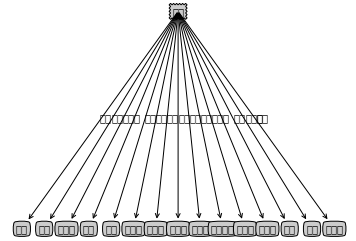

In [45]:
# -*- coding:utf-8-*-
test_df = pd.read_table('purudongwu.txt',sep="\t",encoding='utf-8')
display(test_df.head(5))
test_labels = [U'姓名',U'体温',U'表皮覆盖',U'胎生'
               ,U'水生生物',U'飞行动物',U'有腿',U'冬眠']
#display(np.array(test).tolist())
test_tree = createTree(np.array(test_df).tolist(),test_labels)
createPlot(test_tree)

**贝叶斯分类**

In [33]:
'''
根据贝叶斯定理，需要计算多个概率的乘机，以获得的文档数据某个类别 
所以没个条件概率不能出现零数值，如果一个为零没个其结果也为零了，措施就是就是付初始值
没个词的概率为1/2
数值下溢问题，由于很多太少的数相乘，导致下益，造成结果不正确
（特别提出是在Python中在四舍五入得情况下就是0）解决途径就是自然对数。在代数中
ln(a*b)=ln(a)+ln(b),因此呢在处理这类问题时可以使用自然对数来避免四舍五入和下益问题
f(x)和ln(f(x))在同一定义域内具有相同的极值点和单调性，所以不会影响最终结果
'''

def trainNB(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory)/float(numTrainDocs)  #辱骂率
    #p0Num = np.zeros(numWords)
    #p1Num = np.zeros(numWords)
    p0Num = np.ones(numWords)
    p1Num = np.ones(numWords)
    p0Denom = 2.0
    p1Denom = 2.0 
    for i in range(numTrainDocs):
        if trainCategory[i] == 1: # 侮辱性质的类别
            p1Num += trainMatrix[i] # 向量相加
            p1Denom += np.sum(trainMatrix[i]) # 弟 i 文档有多少在档词语
        else:
            p0Num += trainMatrix[i] # 向量相加
            p0Denom += np.sum(trainMatrix[i]) # 弟 i 文档有多少在档词语
    p1Vect = np.log(p1Num/p1Denom) #在侮辱性文档中每个词的词频
    p0Vect = np.log(p0Num/p0Denom)  #在非侮辱性文档中每个词的词频
    
    return p0Vect,p1Vect,pAbusive
'''
分类函数
'''
def classifyNB(vect2Classify,p0V,p1V,pclass1):
    p1= sum(vect2Classify*p1V)+np.log(pclass1)
    p0 = sum(vect2Classify*p0V)+np.log(1.0-pclass1)
    #print "p1>",p1
    #print "p0>",p0
    if p1 > p0:
        return 1
    else:
        return 0
def loadDataSet():
    postingList=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0,1,0,1,0,1]
    return postingList,classVec
'''
提取向量集
'''
def createVocabList(dataSet):
    vocabSet =set([])
    for document in dataSet:
        vocabSet = vocabSet | set(document)
    #print vocabSet
    return list(vocabSet)
def setOfWords2Vec(vocabList,inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
                returnVec[vocabList.index(word)] =1
        else:
            print "the word: <%s> is not in my Vocabulary!"% word
    return returnVec
def bagOfWords2VecMN(vocabList, inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] += 1
    return returnVec
   
def testingNB():
    listOPosts,listClasses = loadDataSet()
    myVocabList = createVocabList(listOPosts)
    trainMat=[]
    for postinDoc in listOPosts:
        trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    p0V,p1V,pAb = trainNB(np.array(trainMat),np.array(listClasses))
    testEntry = ['love', 'my', 'dalmation']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb)
    testEntry = ['stupid', 'garbage']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb)


In [23]:
testingNB()

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1


In [27]:
'''
获取邮件信息过滤垃圾邮件
'''
def textParse(bigString):
    import re 
    listOfTokens = re.split(r'\W*',bigString)
    return [tok.lower() for tok in listOfTokens if len(tok) > 2]
def spamTest():
    docList=[]; classList = []; fullText =[]
    for i in range(1,26):
        wordList = textParse(open('../Ch04/email/spam/%d.txt' % i).read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1)
        wordList = textParse(open('../Ch04/email/ham/%d.txt' % i).read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    vocabList = createVocabList(docList)#create vocabulary
    trainingSet = range(50); testSet=[]           #create test set
    for i in range(10):
        randIndex = int(random.uniform(0,len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])  
    trainMat=[]; trainClasses = []
    for docIndex in trainingSet:#train the classifier (get probs) trainNB0
        trainMat.append(bagOfWords2VecMN(vocabList, docList[docIndex]))
        trainClasses.append(classList[docIndex])
    p0V,p1V,pSpam = trainNB0(array(trainMat),array(trainClasses))
    errorCount = 0
    for docIndex in testSet:        #classify the remaining items
        wordVector = bagOfWords2VecMN(vocabList, docList[docIndex])
        if classifyNB(array(wordVector),p0V,p1V,pSpam) != classList[docIndex]:
            errorCount += 1
            print "classification error",docList[docIndex]
    print 'the error rate is: ',float(errorCount)/len(testSet)


In [211]:
for i in range(500):
    spamTest()


the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is:  0.1
the error rate is:  0.0
classification error ['benoit', 'mandelbrot', '1924', '2010', 'benoit', 'mandelbrot', '1924', '2010', 'wilmott', 'team', 'benoit', 'mandelbrot', 'the', 'mathematician', 'the', 'father', 'fractal', 'mathematics', 'and', 'advocate', 'more', 'sophisticated', 'modelling', 'quantitative', 'finance', 'died', '14th', 'october', '2010', 'aged', 'wilmott', 'magazine', 'has', 'often', 'featured', 'mandelbrot', 'his', 'ideas', 'and', 'the', 'work', 'others', 'inspired', 'his', 'fundamental', 'insights', 'you', 'must', 'logged', 'view', 'these', 'articles', 'from', 'past', 'issues', 'wilmott', 'magazine

the error rate is:  0.1
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
classification error ['experience', 'with', 'biggerpenis', 'today', 'grow', 'inches', 'more', 'the', 'safest', 'most', 'effective', 'methods', 'of_penisen1argement', 'save', 'your', 'time', 'and', 'money', 'bettererections', 'with', 'effective', 'ma1eenhancement', 'products', 'ma1eenhancement', 'supplement', 'trusted', 'millions', 'buy', 'today']
the error rate is:  0.2
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn',

classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'expertise', 'required', 'scifinance', 'automatic', 'gpu', 'enabled', 'monte', 'carlo', 'pricing', 'model', 'source', 'code', 'generation', 'capabilities', 'have', 'been', 'significantly', 'extended', 'the', 'latest', 'release', 'this', 'includes']
the error rate is:  0.2
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.1
classification error ['yea

classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.1
classification error ['benoit', 'mandelbrot', '1924', '2010', 'benoit', 'mandelbrot', '1924', '2010', 'wilmott', 'team', 'benoit', 'mandelbrot', 'the', 'mathematician', 'the', 'father', 'fractal', 'mathematics', 'and', 'advocate', 'more', 'sophisticated', 'modelling', 'quantitative', 'finance', 'died', '14th', 'october', '2010', 'aged', 'wilmott', 'magazine', 'has', 'often', 'featured', 'mandelbrot', 'his', 'ideas', 'and', 'the', 'work', 'others', 'inspired', 'his', 'fundamental', 'insights', 'you', 'must', 'logged', 'view', 'these', 'articles', 'from', 'past', 'issues', 'wilmott', 'magazine']
the error rate is:  0.1
the error rate is:  0.0
classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'u

the error rate is:  0.1
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is:  0.1
classification error ['ryan', 'whybrew', 'commented', 'your', 'status', 'ryan', 'wrote', 'turd', 'ferguson', 'butt', 'horn']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder',

the error rate is:  0.0
classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'ultimate', '119', 'adobe', 'photoshop', 'cs5', 'extended', 'adobe', 'acrobat', 'pro', 'extended', 'windows', 'professional', 'thousand', 'more', 'titles']
the error rate is:  0.1
classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'expertise', 'required', 'scifinance', 'automatic', 'gpu

classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'ultimate', '119', 'adobe', 'photoshop', 'cs5', 'extended', 'adobe', 'acrobat', 'pro', 'extended', 'windows', 'professional', 'thousand', 'more', 'titles']
the error rate is:  0.1
the error rate is:  0.0
classification error ['yay', 'you', 'both', 'doing', 'fine', 'working', 'mba', 'design', 'strategy', 'cca', 'top', 'art', 'school', 'new', 'program', 'focusing', 'more', 'right', 'brained', 'creative', 'and', 'strategic', 'approach', 'management', 'the', 'way', 'done', 'today']
the error rate is:  0.1
classification error ['linkedin', 'kerry', 'haloney', 'requested', 'add', 'you', 'connection', 'linkedin', 'peter', 'like', 'add', 'you', 'professional', 'network', 'linkedin', 'kerry', 'haloney']
the error rate is:  0.1
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar',

classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'expertise', 'required', 'scifinance', 'automatic', 'gpu', 'enabled', 'monte', 'carlo', 'pricing', 'model', 'source', 'code', 'generation', 'capabilities', 'have', 'been', 'significantly', 'extended', 'the', 'latest', 'release', 'this', 'includes']
the error rate is:  0.1
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.1
classification error ['ben

classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.1
the error rate is:  0.0
classification error ['yay', 'you', 'both', 'doing', 'fine', 'working', 'mba', 'design', 'strategy', 'cca', 'top', 'art', 'school', 'new', 'program', 'focusing', 'more', 'right', 'brained', 'creative', 'and', 'strategic', 'approach', 'management', 'the', 'way', 'done', 'today']
the error rate is:  0.1
classification error ['benoit', 'mandelbrot', '1924', '2010', 'benoit', 'mandelbrot', '1924', '2010', 'wilmott', 'team', 'benoit', 'mandelbrot', 'the', 'mathematician', 'the', 'father', 'fractal', 'mathematics', 'and', 'advocate', 'more', 'sophisticated', 'modelling', 'quantitative', 'finance', 'died', '14th', 'october', '2010', 'aged', 'wilmott', 'magazine', 'has', 'often', 'featured', 'mandelbrot', 'his', 'ideas', 'and', 'the', 'work', 'others', 'inspired', 'his', 'fundamental', 'insights', 'you', 'must', 'logg

the error rate is:  0.0
the error rate is:  0.0
classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'ultimate', '119', 'adobe', 'photoshop', 'cs5', 'extended', 'adobe', 'acrobat', 'pro', 'extended', 'windows', 'professional', 'thousand', 'more', 'titles']
the error rate is:  0.1
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
the error rate is:  0.0
classification error ['scifinance', 'now', 'a

the error rate is:  0.1
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is:  0.1
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and

classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'ultimate', '119', 'adobe', 'photoshop', 'cs5', 'extended', 'adobe', 'acrobat', 'pro', 'extended', 'windows', 'professional', 'thousand', 'more', 'titles']
the error rate is:  0.1
the error rate is:  0.0
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.1
the error rate is:  0.0
classification error ['yay', 'you', 'both', 'doing', 'fine', 'working', 'mba', 'design', 'strategy', 'cca', 'top', 'art', 'school', 'new', 'program', 'focusing', 'more', 'right', 'brained', 'creative', 'and', 'strategic', 'approach', 'management', 'the', 'way', 'done', 'today']
the error rate is:  0.1
classification error ['buyviagra', '25mg', '50mg', '100mg', 'brandviagra', 'femaleviagra', 'from', 'per', 'pill', 'viagr

the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is:  0.1
classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'exp

the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'ultimate', '119', 'adobe', 'photoshop', 'cs5', 'extended', 'adobe', 'acrobat', 'pro', 'extended', 'windows', 'professional', 'thousand', 'more', 'titles']
the error rate is:  0.1
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
the error rate is:  0

classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is:  0.1
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
classification error ['benoit', 'mandelbrot', '1924', '2010', 'benoit', 'mandelbrot', '1924', '2010', 'wilmott', 'team', 'benoit', 'mandelbrot', 'the', 'mathematician', 'the', 'father', 'fractal',

classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
classification error ['yay', 'you', 'both', 'doing', 'fine', 'working', 'mba', 'design', 'strategy', 'cca', 'top', 'art', 'school', 'new', 'program', 'focusing', 'more', 'right', 'brained', 'creative', 'and', 'strategic', 'approach', 'management', 'the', 'way', 'done', 'today']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
classification error ['benoit', 'mandelbrot', '1924', '2010', 'benoit', 'mandelbrot', '1924', '2010', 'wilmott', 'team', 'benoit', 'mandelbrot', 'the', 'mathematician', 'the', 'father', 'fractal', 'mathematics', 'and', 'advocate', 'more', 'sophisticated', 'modelling', 'quantitative', 'finance', 'died', '14th', 'october', '2010', 'aged', 'wilmott', 'magazine', 'has', 'often', 'featured', 'mandelbrot', 'his', 

classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'expertise', 'required', 'scifinance', 'automatic', 'gpu', 'enabled', 'monte', 'carlo', 'pricing', 'model', 'source', 'code', 'generation', 'capabilities', 'have', 'been', 'significantly', 'extended', 'the', 'latest', 'release', 'this', 'includes']
the error rate is:  0.1


In [37]:
'''
使用朴素贝叶斯分类器从个人广告中获取区域倾向
'''
import feedparser
ny = feedparser.parse("http://newyork.craigslist.org/stp/index.rss")
sf = feedparser.parse("http://sfbay.craigslist.org/stp/index.rss")
display(np)
display(sf)
'''
计算词频
'''
def calcMostFreq(vocabList,fullText):
    import operator
    freqDict = {}
    for token in vocabList:
        freqDict[token]=fullText.count(token)
    sortedFreq = sorted(freqDict.iteritems(), key=operator.itemgetter(1), reverse=True) 
    return sortedFreq[:30]       

def localWords(feed1,feed0):
    import feedparser
    docList=[]; classList = []; fullText =[]
    minLen = min(len(feed1['entries']),len(feed0['entries']))
    for i in range(minLen):
        wordList = textParse(feed1['entries'][i]['summary'])
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1) #NY is class 1
        wordList = textParse(feed0['entries'][i]['summary'])
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    vocabList = createVocabList(docList)#create vocabulary
    top30Words = calcMostFreq(vocabList,fullText)   #remove top 30 words
    for pairW in top30Words:
        if pairW[0] in vocabList: vocabList.remove(pairW[0])
    trainingSet = range(2*minLen); testSet=[]           #create test set
    for i in range(20):
        randIndex = int(np.random.uniform(0,len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])  
    trainMat=[]; trainClasses = []
    for docIndex in trainingSet:#train the classifier (get probs) trainNB0
        trainMat.append(bagOfWords2VecMN(vocabList, docList[docIndex]))
        trainClasses.append(classList[docIndex])
    p0V,p1V,pSpam = trainNB(np.array(trainMat),np.array(trainClasses))
    errorCount = 0
    for docIndex in testSet:        #classify the remaining items
        wordVector = bagOfWords2VecMN(vocabList, docList[docIndex])
        if classifyNB(np.array(wordVector),p0V,p1V,pSpam) != classList[docIndex]:
            errorCount += 1
    print 'the error rate is: ',float(errorCount)/len(testSet)
    return vocabList,p0V,p1V

def getTopWords(ny,sf):
    import operator
    vocabList,p0V,p1V=localWords(ny,sf)
    topNY=[]; topSF=[]
    for i in range(len(p0V)):
        if p0V[i] > -6.0 : topSF.append((vocabList[i],p0V[i]))
        if p1V[i] > -6.0 : topNY.append((vocabList[i],p1V[i]))
    sortedSF = sorted(topSF, key=lambda pair: pair[1], reverse=True)
    print "SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**"
    for item in sortedSF:
        print item[0]
    sortedNY = sorted(topNY, key=lambda pair: pair[1], reverse=True)
    print "NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**"
    for item in sortedNY:
        print item[0]

<module 'numpy' from 'c:\programdata\anaconda3\envs\py2.7\lib\site-packages\numpy\__init__.pyc'>

{'bozo': 0,
 'encoding': u'utf-8',
 'entries': [{'dc_source': u'https://sfbay.craigslist.org/sfc/stp/d/staying-at-grand-wailea-maui/6362392714.html',
   'dc_type': u'text',
   'enc_enclosure': {'resource': u'https://images.craigslist.org/00s0s_iN6svFZNi9j_300x300.jpg',
    'type': u'image/jpeg'},
   'id': u'https://sfbay.craigslist.org/sfc/stp/d/staying-at-grand-wailea-maui/6362392714.html',
   'language': u'en-us',
   'link': u'https://sfbay.craigslist.org/sfc/stp/d/staying-at-grand-wailea-maui/6362392714.html',
   'links': [{'href': u'https://sfbay.craigslist.org/sfc/stp/d/staying-at-grand-wailea-maui/6362392714.html',
     'rel': u'alternate',
     'type': u'text/html'}],
   'published': u'2017-10-29T07:15:06-07:00',
   'published_parsed': time.struct_time(tm_year=2017, tm_mon=10, tm_mday=29, tm_hour=14, tm_min=15, tm_sec=6, tm_wday=6, tm_yday=302, tm_isdst=0),
   'rights': u'copyright 2017 craiglist',
   'rights_detail': {'base': u'https://sfbay.craigslist.org/search/stp?format=rss

In [38]:
localWords(ny,sf)

the error rate is:  0.15


([u'all',
  u'people',
  u'hanging',
  u'situati',
  u'apartment',
  u'young',
  u'send',
  u'masculine',
  u'friendly',
  u'activities',
  u'very',
  u'fat',
  u'minded',
  u'cool',
  u'skills',
  u'joined',
  u'sane',
  u'enjoy',
  u'lecturing',
  u'sigh',
  u'boots',
  u'street',
  u'casual',
  u'depression',
  u'drinks',
  u'39yo',
  u'what',
  u'giving',
  u'section',
  u'current',
  u'new',
  u'body',
  u'outgoing',
  u'desires',
  u'never',
  u'here',
  u'hours',
  u'explore',
  u'others',
  u'active',
  u'sexy',
  u'100',
  u'beca',
  u'change',
  u'fantasies',
  u'great',
  u'healthy',
  u'fwb',
  u'pics',
  u'adjectives',
  u'weekday',
  u'smoke',
  u'social',
  u'usually',
  u'makes',
  u'massage',
  u'thats',
  u'love',
  u'manage',
  u'pantyhose',
  u'from',
  u'takes',
  u'fem',
  u'sports',
  u'cherished',
  u'music',
  u'wondering',
  u'oils',
  u'type',
  u'tell',
  u'today',
  u'more',
  u'sort',
  u'knows',
  u'relax',
  u'started',
  u'share',
  u'company',
  u'down

In [39]:
getTopWords(ny,sf)

the error rate is:  0.5
SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**
nice
from
male
things
chat
going
else
lady
home
time
friendly
enjoy
new
downtown
movies
want
over
coffee
bashful
day
our
open
city
too
feeling
need
also
close
email
recently
job
much
those
hang
student
person
lets
discreet
some
anything
area
there
avail
lonely
bored
single
welcome
age
hello
situati
activities
fat
joined
lecturing
street
drinks
what
giving
section
others
change
pics
adjectives
social
thats
love
takes
cherished
music
wondering
type
more
started
phone
women
valued
work
can
meet
process
laughs
stroke
preferably
till
intelligent
140
lay
ethnic
guys
man
cannot
boyfri
comfort
office
mainly
through
looks
edging
lunch
nov
hearing
term
ooking
each
everyone
primarily
doing
year
bay
special
really
hangouts
cart
ask
care
grad
conversation
platonic
feel
ons
least
anyone
exploring
relationship
part
gotten
matter
iron
say
buy
nights
self
responsible
without
build
wanting
latino
nothing
why
don
med